In [1]:
import graphviz
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer()
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [2]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data_breast_cancer.data[:, [1, 8]] 
y = data_breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depth = 3

tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

tree_clf.fit(X_train, y_train)

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, tree_clf.predict(X_train))
accuracy_test = accuracy_score(y_test, tree_clf.predict(X_test))

print(f1_train, f1_test, accuracy_train, accuracy_test)


0.8211243611584327 0.7887323943661971 0.7692307692307693 0.7368421052631579


In [3]:
# results = []
# for depth in range(1,10):
#     tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
# 
#     tree_clf.fit(X_train, y_train)
# 
#     y_pred_train = tree_clf.predict(X_train)
#     y_pred_test = tree_clf.predict(X_test)
# 
#     f1_train = f1_score(y_train, y_pred_train)
#     f1_test = f1_score(y_test, y_pred_test)
#     f1_scores = (f1_train, f1_test)
#     results.append(f1_scores)
# 
# print(results)
    

In [4]:
from sklearn.tree import export_graphviz
import graphviz

f = "bc.dot"
str_dot = export_graphviz(tree_clf, out_file=None, 
                feature_names=['mean texture', 'mean symmetry'],
                class_names=['malignant', 'benign']
                ,rounded=True,
                filled=True)
graph = graphviz.Source(str_dot)

graph.render(filename='bc', format='png')

'bc.png'

In [5]:
import pickle

array = [depth, f1_train, f1_test, accuracy_train, accuracy_test]

with open("f1acc_tree.pkl", "wb") as file:
    pickle.dump(array, file)

<Axes: xlabel='x', ylabel='y'>

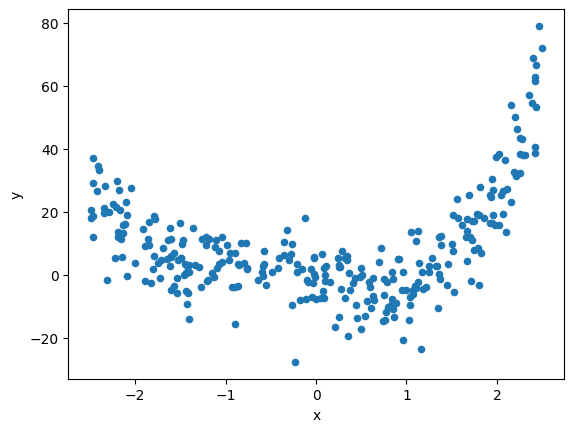

In [6]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# results = []
# for depth in range(1,9):
#     tree_clf = DecisionTreeRegressor(max_depth=depth, random_state=42)
# 
#     tree_clf.fit(X_train, y_train)
# 
#     y_train_pred = tree_clf.predict(X_train)
#     y_test_pred = tree_clf.predict(X_test)
# 
#     mse_train = mean_squared_error(y_train, y_train_pred)
#     mse_test = mean_squared_error(y_test, y_test_pred)
# 
#     mse_score = (mse_train, mse_test)
#     results.append(mse_score)
# 
# print(results)

In [9]:
tree_clf = DecisionTreeRegressor(max_depth=4, random_state=42)

tree_clf.fit(X_train, y_train)

y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [10]:
str_dot = export_graphviz(tree_clf, out_file=None,
                rounded=True,
                filled=True)
graph = graphviz.Source(str_dot)

graph.render(filename='reg', format='png')

'reg.png'

In [11]:
array2 = [4, mse_train, mse_test]
print(array2)

[4, 53.99066419635856, 77.33005461409408]


In [12]:
with open("mse_tree.pkl", "wb") as file:
    pickle.dump(array2, file)